# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Robel\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [5]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_mean = sfo_data.groupby(sfo_data.index).mean()
sfo_data_housing_units_mean = sfo_data_mean['housing_units']
sfo_data_housing_units_min = sfo_data_mean['housing_units'].min()
sfo_data_housing_units_max = sfo_data_mean['housing_units'].max()
sfo_data_housing_units_mean


year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
2015    382295
2016    384242
Name: housing_units, dtype: int64

In [6]:
# Save the dataframe as a csv file
sfo_data_housing_units_mean.to_csv('Data/housing_units_by_year.csv', index=True)

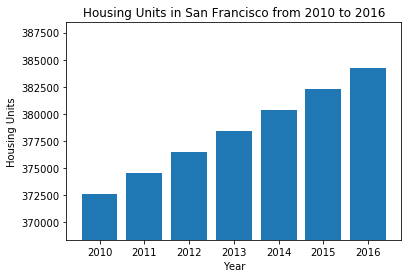

In [7]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.

# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
plt.ylim(sfo_data_housing_units_min-sfo_data_housing_units_mean.std(), sfo_data_housing_units_max+sfo_data_housing_units_mean.std())
plt.bar( sfo_data_housing_units_mean.index, sfo_data_housing_units_mean.iloc[0:])
plt.title('Housing Units in San Francisco from 2010 to 2016')
plt.ylabel('Housing Units')
plt.xlabel('Year')
plt.show()

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [8]:
# Calculate the average sale price per square foot and average gross rent
sales_price_and_gross_rent = sfo_data_mean.drop(columns = 'housing_units')
sales_price_and_gross_rent

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


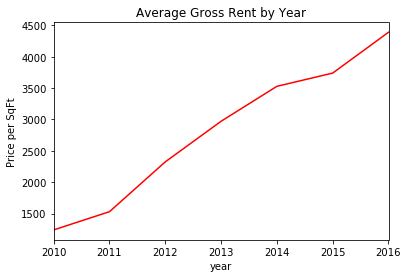

In [22]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
plt.xlabel('Year')
plt.ylabel('Price per SqFt')
plt.title('Average Gross Rent by Year')


# Line chart for average sale price per square foot
sales_price_and_gross_rent['gross_rent'].plot(c='red')

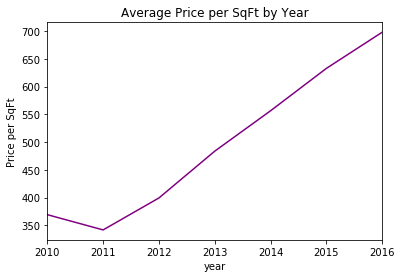

In [24]:
# Line chart for average montly rent
plt.xlabel('Year')
plt.ylabel('Price per SqFt')
plt.title('Average Price per SqFt by Year')

sales_price_and_gross_rent['sale_price_sqr_foot'].plot(c='purple')


- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [46]:
# Group by year and neighborhood and then create a new dataframe of the mean values

neighborhood = sfo_data.reset_index()
neighborhood = neighborhood.rename(columns={
    'year': 'Year',
    'sale_price_sqr_foot':'Avg. Sale Price per Square Foot',
    'gross_rent': 'Avg. Gross Rent per Year'
    }
)
new_sfo_data = neighborhood.groupby(['neighborhood','Year']).mean()
new_sfo_data

Avg. Sale Price per Square Foot  housing_units  \
neighborhood           Year                                                   
Alamo Square           2010                       291.182945         372560   
                       2011                       272.527310         374507   
                       2012                       183.099317         376454   
                       2013                       387.794144         378401   
                       2014                       484.443552         380348   
                       2015                       602.115877         382295   
                       2016                       340.981835         384242   
Anza Vista             2010                       267.932583         372560   
                       2012                       344.490914         376454   
                       2013                       453.340498         378401   
                       2014                       620.441407         380348   
                       2015                       465.686275         382295   
                       2016                        88.401511         384242   
Bayview                2010                       170.098665         372560   
                       2011                       172.540562         374507   
                       2012                       165.798062         376454   
                       2013                       259.547163         378401   
                       2014                       254.958662         380348   
Bayview Heights        2015                       590.792839         382295   
Bernal Heights         2011                       471.921732         374507   
                       2012                       368.266561         376454   
                       2013                       630.897303         378401   
                       2014                       544.546929         380348   
                       2015                       458.004299         382295   
                       2016                       986.842105         384242   
Buena Vista Park       2010                       347.394919         372560   
                       2011                       171.772347         374507   
                       2012                       338.601164         376454   
                       2013                       455.218089         378401   
                       2015                       551.695622         382295   
...                                                      ...            ...   
Van Ness/ Civic Center 2011                       384.236802         374507   
                       2012                       345.958040         376454   
                       2013                       285.009506         378401   
                       2014                       475.393187         380348   
                       2015                       677.838232         382295   
                       2016                       552.602567         384242   
Visitacion Valley      2013                       293.298372         378401   
                       2014                       282.025468         380348   
                       2015                       302.221873         382295   
                       2016                       328.319007         384242   
West Portal            2010                       392.300764         372560   
                       2012                       325.795415         376454   
                       2013                       588.074797         378401   
                       2014                       687.782963         380348   
Western Addition       2010                       215.569134         372560   
                       2011                       227.418981         374507   
                       2012                       274.338460         376454   
                       2013                       217.089069         378401   


In [47]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
new_sfo_data.hvplot(x='Year', y='Avg. Sale Price per Square Foot', groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [Year]   (Avg. Sale Price per Square Foot)

In [48]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
new_sfo_data.hvplot(x='Year', y='Avg. Gross Rent per Year', groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [Year]   (Avg. Gross Rent per Year)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [74]:
# Getting the data from the top 10 expensive neighborhoods to own
sfo_data = sfo_data.rename(
    columns={
        'neighborhood':'Neighborhood'
    }
)
sfo_data_mean_by_neighborhood = sfo_data.groupby(sfo_data['Neighborhood']).mean()
top_10=sfo_data_mean_by_neighborhood.sort_values('sale_price_sqr_foot',ascending=False).head(10)
top_10 = top_10.rename(
    columns={
    'sale_price_sqr_foot': 'Avg. Sale Price per Square Foot'
    }    
)
top_10


,Avg. Sale Price per Square Foot,housing_units,gross_rent
Neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [81]:
# Plotting the data from the top 10 expensive neighborhoods
top_10.hvplot.bar(x='Neighborhood', y='Avg. Sale Price per Square Foot', rot=90).opts(title = 'Top 10 Expensive Neighborhoods in SFO')

:Bars   [Neighborhood]   (Avg. Sale Price per Square Foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [92]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
top_10_sfo_data = new_sfo_data.loc[top_10.index]
top_10_sfo_data

Avg. Sale Price per Square Foot  housing_units  \
neighborhood          Year                                                   
Cow Hollow            2010                       569.379968         372560   
                      2011                       390.595653         374507   
                      2012                       644.818307         376454   
                      2013                       707.402809         378401   
                      2014                       691.865411         380348   
                      2015                       598.620541         382295   
                      2016                      1059.065602         384242   
Merced Heights        2012                       421.141245         376454   
                      2014                       528.726541         380348   
                      2016                      1416.666667         384242   
Miraloma Park         2010                       680.608729         372560   
                      2011                       414.676065         374507   
                      2012                       756.192373         376454   
                      2014                      1267.766203         380348   
Pacific Heights       2010                       496.516014         372560   
                      2011                       509.021480         374507   
                      2012                       586.218215         376454   
                      2013                       503.899261         378401   
                      2014                       824.658694         380348   
                      2015                       910.187690         382295   
                      2016                       996.389364         384242   
Potrero Hill          2010                       491.450004         372560   
                      2011                       503.138505         374507   
                      2012                       466.647840         376454   
                      2013                       598.704795         378401   
                      2014                      1045.201546         380348   
                      2015                       821.300990         382295   
                      2016                       707.651609         384242   
Presidio Heights      2010                       549.417931         372560   
                      2011                       493.814917         374507   
                      2012                       426.608592         376454   
                      2013                       512.840248         378401   
                      2014                       603.450997         380348   
                      2015                              NaN         382295   
                      2016                      1465.968586         384242   
South Beach           2010                      1037.099789         372560   
                      2011                       388.644337         374507   
                      2014                       524.629312         380348   
Telegraph Hill        2010                       524.793509         372560   
                      2011                       483.405773         374507   
                      2012                       465.802122         376454   
                      2013                       653.311617         378401   
                      2014                       708.193032         380348   
                      2015                       996.990220         382295   
                      2016                       903.049771         384242   
Union Square District 2010                       569.193448         372560   
                      2011                       302.123253         374507   
                      2012                       445.196788         376454   
                      2013                      1290.472107         378401   
                      2014                       5

In [98]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_sfo_data.hvplot.bar(y=['Avg. Gross Rent per Year','Avg. Sale Price per Square Foot'],groupby='neighborhood',rot=90).opts(title = 'Top 10 Expensive Neighborhoods in SFO')

:DynamicMap   [neighborhood]
   :Bars   [Year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [16]:
# Load neighborhoods coordinates data
# YOUR CODE HERE!

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [17]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!

,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [18]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

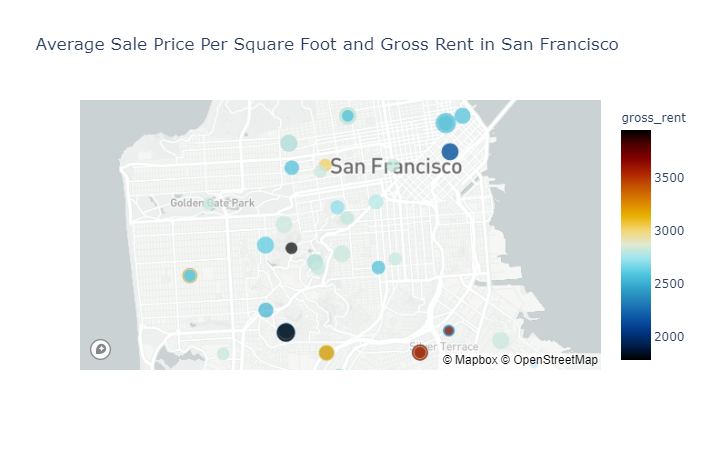

In [19]:
# Set the mapbox access token
# YOUR CODE HERE!

# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


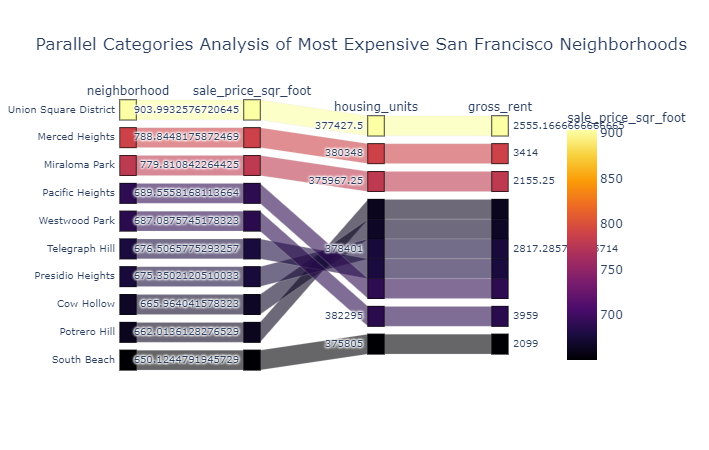

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

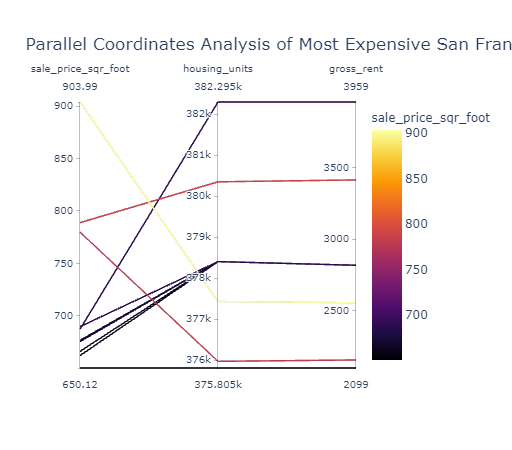

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

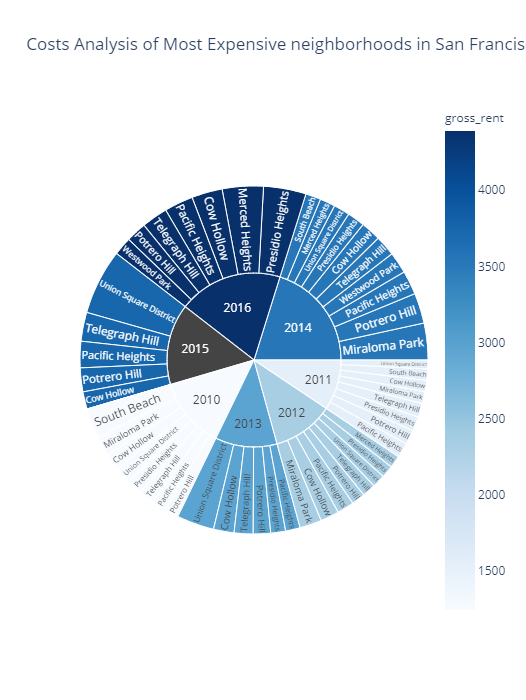

In [23]:
# Sunburst Plot
# YOUR CODE HERE!